In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from icecream import ic
import statsmodels.api as sm


C:\Users\Tobia\AppData\Local\Temp\ipykernel_6900\2316799120.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  time_d = time_d.replace('t',0)


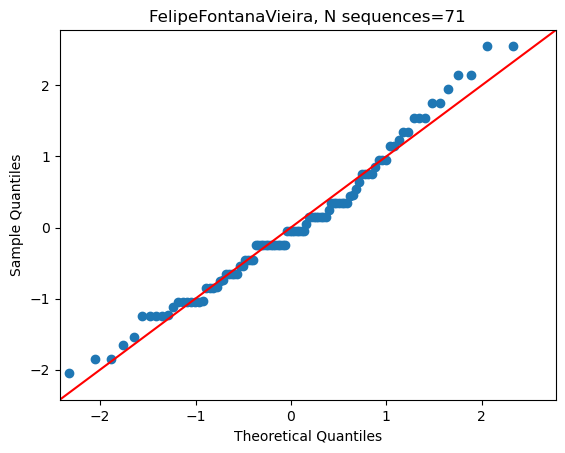

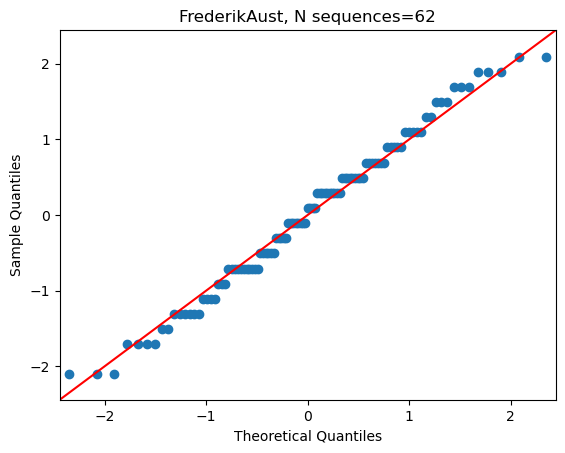

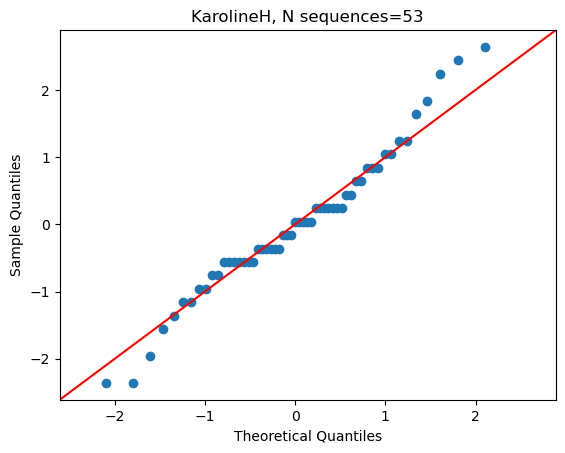

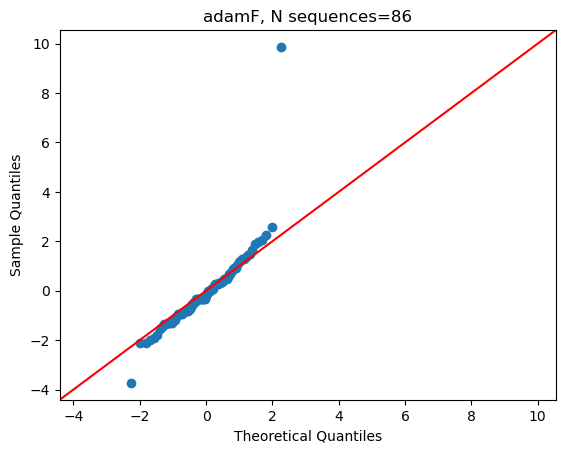

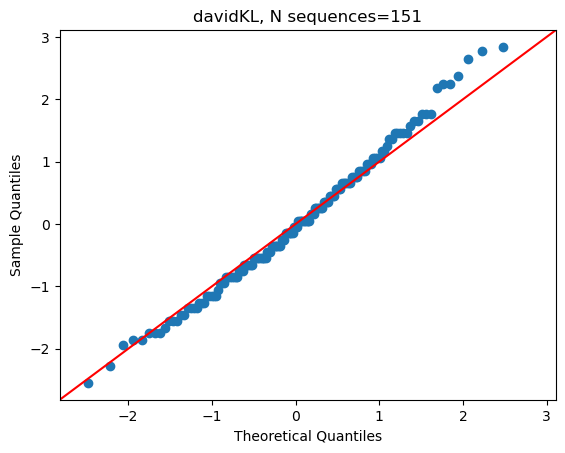

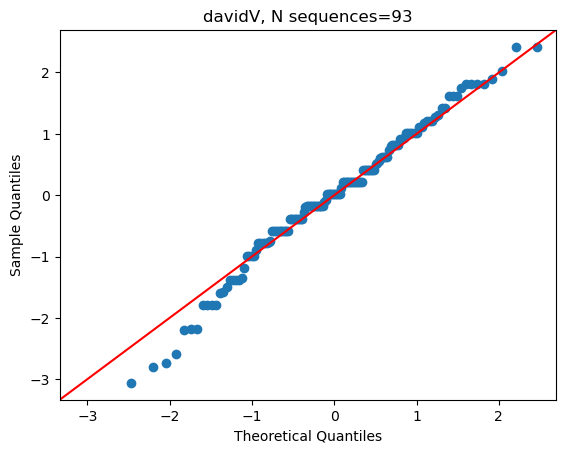

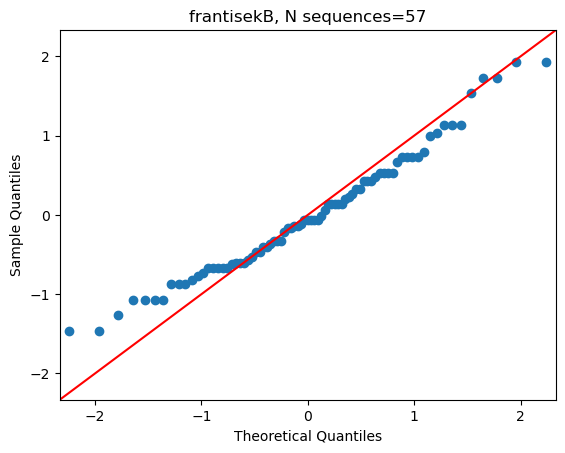

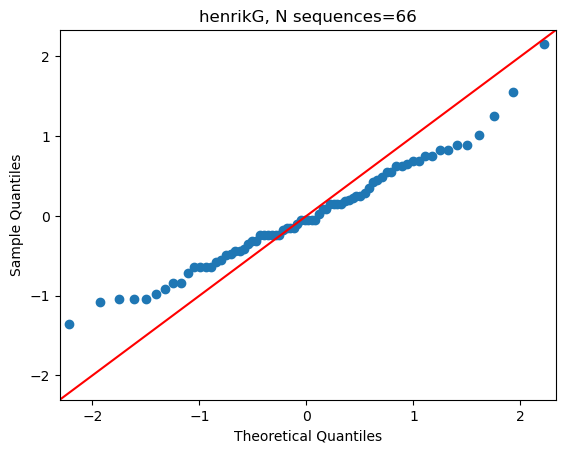

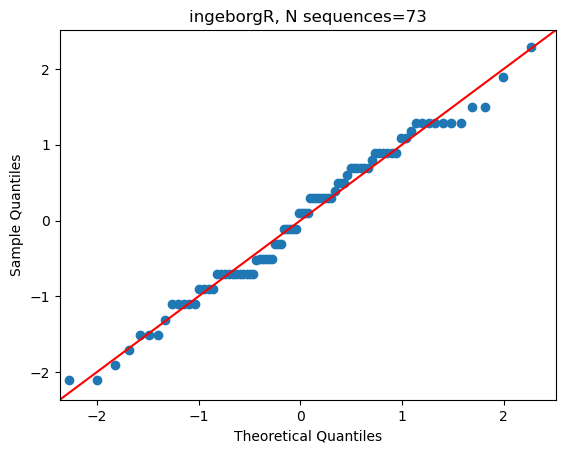

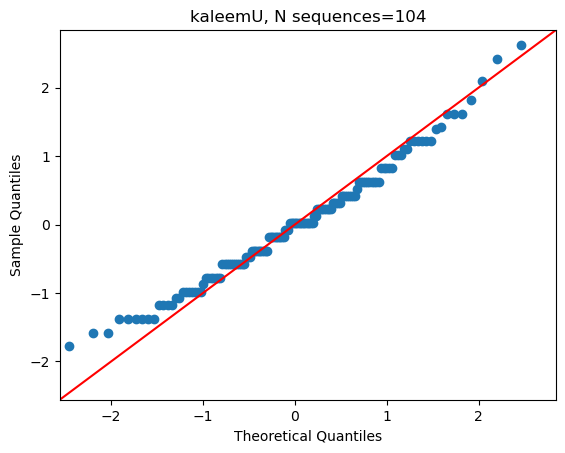

In [27]:

time_d = pd.read_csv('../data/full-coin-data/coin data/analyses/df-time.csv')
#print(time_d.head())
time_d = time_d.replace('h',1)
time_d = time_d.replace('t',0)
# group by sequence_id and print head
time_d_grouped = time_d.groupby(['person','sequence_id'])['toss_end'].mean().apply(lambda x : x)
# for each person, print the maximal sequence_id
max_seq = time_d_grouped.groupby('person').idxmax()
#ic(max_seq)
min_seq = 50
n_toss_per_seq = 100
# for people with maximal sequence_id > 50, check for normality of the mean of the toss_end
for person in max_seq.index:
    if max_seq[person][1] > min_seq:
        #ic(person)
        mean = time_d_grouped[person].mean()
        std = np.sqrt( mean * (1-mean) / n_toss_per_seq )
        #std = time_d_grouped[person].std()
        # plot the qqplot of the normalised data
        fig = sm.qqplot(((time_d_grouped[person]-mean)/std), line='45')
        plt.title(f'{person}, N sequences={max_seq[person][1]}')
        
        plt.show()
    

C:\Users\Tobia\AppData\Local\Temp\ipykernel_6900\432797286.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  time_d = time_d.replace('t',0)
C:\Users\Tobia\AppData\Local\Temp\ipykernel_6900\432797286.py:40: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


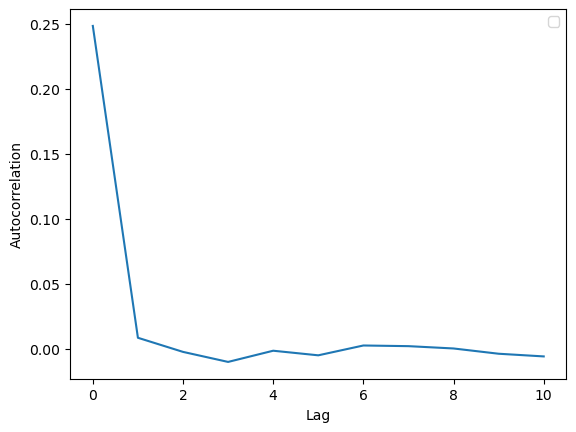

In [52]:
time_d = pd.read_csv('../data/full-coin-data/coin data/analyses/df-time.csv')
#print(time_d.head())
time_d = time_d.replace('h',1)
time_d = time_d.replace('t',0)

# GPT suggestion
# Step 1: Filter for sequence_id = 1
filtered_df = time_d[time_d["sequence_id"] == 1]

# Step 2: Group by 'person' and assemble 'toss_end' into arrays
toss_end_arrays = filtered_df.groupby("person")["toss_end"].apply(list)

# Step 3: Define a function to compute the autocorrelation
def compute_autocorrelation(data, max_lag):
    n = len(data)
    mean = np.mean(data)
    result = []
    for lag in range(max_lag + 1):
        autocorr = np.correlate(data[:n-lag] - mean, data[lag:] - mean) / (n - lag)
        result.append(autocorr[0])
    return result

# Compute autocorrelation for each person
max_delay = 10
autocorrelation_results = {}
for person, toss_ends in toss_end_arrays.items():
    if len(toss_ends) > 1:  # Autocorrelation requires at least two data points
        autocorrelation_results[person] = compute_autocorrelation(np.array(toss_ends), max_delay)
    else:
        autocorrelation_results[person] = [np.nan] * (max_delay + 1)

# take the mean of the autocorrelation over the persons
mean_autocorrelation = np.mean(list(autocorrelation_results.values()), axis=0)

# Display the results by plotting the autocorrelation for each person
#for person, autocorr in autocorrelation_results.items():
plt.plot(mean_autocorrelation)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.legend()
plt.show()


C:\Users\Tobia\AppData\Local\Temp\ipykernel_6900\2809380023.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  time_d = time_d.replace('t',0)


Averaged Autocorrelation Function for davidV: [ 2.47117226e-01 -1.35042907e-04 -2.90242503e-03 -2.87805833e-03
 -4.02647038e-03 -2.43496356e-04 -3.54412519e-03 -9.82438175e-04
 -7.19156631e-03 -2.58364390e-03 -4.87385696e-03]


Text(0, 0.5, 'Autocorrelation')

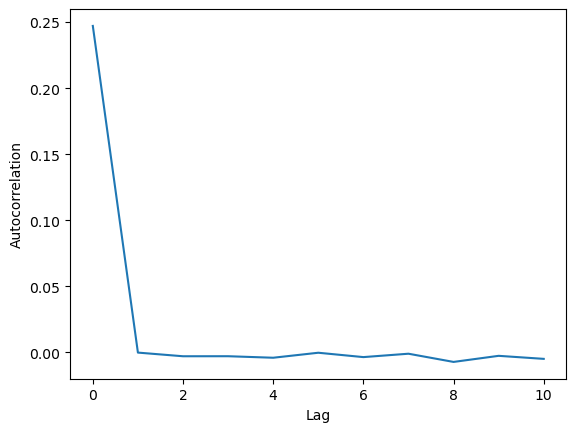

In [55]:
import pandas as pd
import numpy as np

time_d = pd.read_csv('../data/full-coin-data/coin data/analyses/df-time.csv')
#print(time_d.head())
time_d = time_d.replace('h',1)
time_d = time_d.replace('t',0)

# Step 1: Select a specific person
selected_person = "davidV"
person_df = time_d[time_d["person"] == selected_person]

# Step 2: Group by 'sequence_id' and assemble 'toss_end' into arrays
grouped_toss_ends = person_df.groupby("sequence_id")["toss_end"].apply(list)

# Step 3: Define a function to compute the autocorrelation
def compute_autocorrelation(data, max_lag):
    n = len(data)
    mean = np.mean(data)
    result = []
    for lag in range(max_lag + 1):
        autocorr = np.correlate(data[:n-lag] - mean, data[lag:] - mean) / (n - lag)
        result.append(autocorr[0])
    return result

# Step 4: Compute autocorrelation for each sequence_id and store the results
max_delay = 10
sequence_acfs = []
for toss_ends in grouped_toss_ends:
    if len(toss_ends) > 1:  # Ensure at least two data points for autocorrelation
        acf = compute_autocorrelation(np.array(toss_ends), max_delay)
        sequence_acfs.append(acf)

# Step 5: Average the ACF across all sequence_id
if sequence_acfs:
    averaged_acf = np.mean(sequence_acfs, axis=0)
else:
    averaged_acf = [np.nan] * (max_delay + 1)

# Display the result
print(f"Averaged Autocorrelation Function for {selected_person}: {averaged_acf}")
# plot
plt.plot(averaged_acf)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")

